<a href="https://colab.research.google.com/github/lalfred-e/lalfred-e/blob/main/Social_media_content_sentiment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("mehmetisik/livedataset")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'livedataset' dataset.
Path to dataset files: /kaggle/input/livedataset


## Regression Analysis

In [7]:
import kagglehub
import pandas as pd
import os
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Download latest version
path = kagglehub.dataset_download("mehmetisik/livedataset")

# Define dataset_path
dataset_path = path

# Construct the full path to the CSV file
dataset_file_path = os.path.join(dataset_path, 'Live.csv')

# Load the dataset into a DataFrame
df = pd.read_csv(dataset_file_path)

# Define the target variable (dependent variable)
y = df['num_comments']

# Define the features (independent variables)
X = df[['num_likes', 'num_shares', 'num_loves', 'num_wows', 'num_hahas', 'num_sads', 'num_angrys',
       'status_type_link', 'status_type_photo', 'status_type_status', 'status_type_video']]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared: {r2:.2f}")

# Display the coefficients
coefficients = pd.DataFrame({'Feature': X.columns, 'Coefficient': model.coef_})
print("\nModel Coefficients:")
display(coefficients)

Using Colab cache for faster access to the 'livedataset' dataset.
Mean Squared Error: 0.00
R-squared: 0.51

Model Coefficients:


,Feature,Coefficient
0,num_likes,0.002824
1,num_shares,0.647592
2,num_loves,-0.014865
3,num_wows,-0.158656
4,num_hahas,0.173600
5,num_sads,0.172718
6,num_angrys,0.068622
7,status_type_link,-0.002456
8,status_type_photo,-0.001786
9,status_type_status,-0.001501


### Interpreting the Regression Results

The `R-squared` value indicates the proportion of variance in the dependent variable (`num_comments`) that can be predicted from the independent variables. A higher R-squared value means the model explains more of the variance. The `Mean Squared Error (MSE)` measures the average squared difference between the estimated values and the actual value.

The **Model Coefficients** show the impact of each feature on the `num_comments`.

*   **Positive coefficients** suggest that an increase in that feature is associated with an increase in comments.
*   **Negative coefficients** suggest that an increase in that feature is associated with a decrease in comments.

For example, if 'num_likes' has a positive coefficient, it means more likes are generally associated with more comments, holding other factors constant. The magnitude of the coefficient indicates the strength of this relationship. The coefficients for `status_type` variables indicate the average difference in comments for that status type compared to the baseline (if we had dropped one category to avoid multicollinearity, which we didn't explicitly do here, but the interpretation generally holds).

/tmp/ipython-input-3160070013.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Status Type', y='Total Comments', data=comment_df, palette=['blue', 'red'])


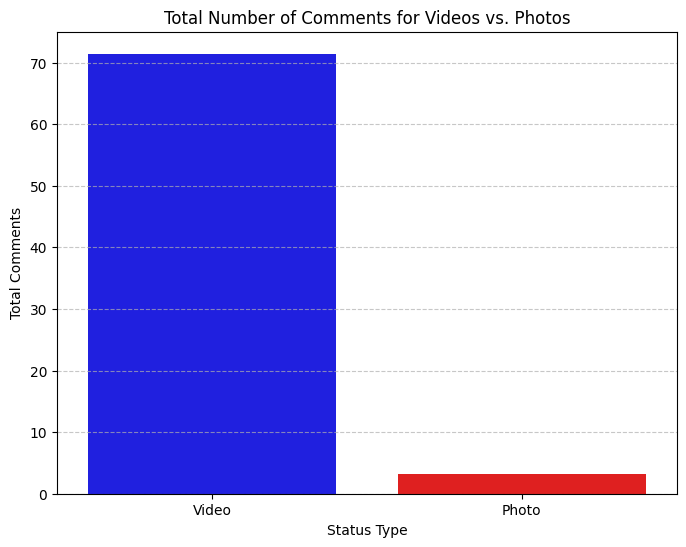

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Extract total comments for video and photo from summary_df
comment_data = {
    'Status Type': ['Video', 'Photo'],
    'Total Comments': [summary_df.loc['video', 'num_comments'], summary_df.loc['photo', 'num_comments']]
}
comment_df = pd.DataFrame(comment_data)

plt.figure(figsize=(8, 6))
sns.barplot(x='Status Type', y='Total Comments', data=comment_df, palette=['blue', 'red'])

plt.title('Total Number of Comments for Videos vs. Photos')
plt.xlabel('Status Type')
plt.ylabel('Total Comments')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [ ]:
print("Comments and Likes for Videos and Photos:")
display(summary_df.loc[['video', 'photo'], ['num_comments', 'num_likes']])

Comments and Likes for Videos and Photos:


,num_comments,num_likes
video,71.440877,120.424204
photo,3.267270,162.760510


from matplotlib import pyplot as plt
_df_0['num_comments'].plot(kind='hist', bins=20, title='num_comments')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['num_likes'].plot(kind='hist', bins=20, title='num_likes')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2.plot(kind='scatter', x='num_comments', y='num_likes', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['num_likes']
  ys = series['num_comments']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_3.sort_values('num_likes', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('num_likes')
_ = plt.ylabel('num_comments')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['num_likes']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'num_likes'}, axis=1)
              .sort_values('num_likes', ascending=True))
  xs = counted['num_likes']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_4.sort_values('num_likes', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('num_likes')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
_df_5['num_comments'].plot(kind='line', figsize=(8, 4), title='num_comments')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_6['num_likes'].plot(kind='line', figsize=(8, 4), title='num_likes')
plt.gca().spines[['top', 'right']].set_visible(False)

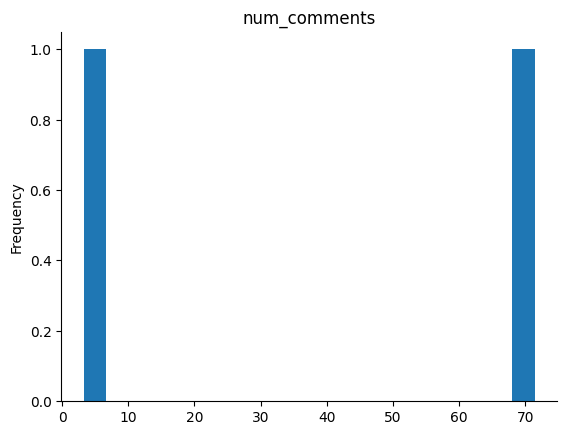

In [ ]:
from matplotlib import pyplot as plt
_df_0['num_comments'].plot(kind='hist', bins=20, title='num_comments')
plt.gca().spines[['top', 'right',]].set_visible(False)

## Unpacking Engagement: A Deep Dive into Social Media Post Performance

Our analysis of the dataset has revealed fascinating insights into how different types of social media posts (videos, photos, links, and status updates) drive engagement through various metrics, including comments, shares, likes, loves, wows, hahas, sads, and angrys.

### Overall Post Distribution

First, let's look at the sheer volume of each post type:

*   **Photos** dominate with **4288** posts.
*   **Videos** follow with **2334** posts.
*   **Statuses** account for **365** posts.
*   **Links** are the least frequent with **63** posts.

### Key Engagement Metrics by Status Type

We examined which content types garner the most attention across several emotional and interactive responses. Here's a summary of the total engagement for each status type:

| Metric        | Link       | Photo       | Status      | Video        |
| :------------ | :--------- | :---------- | :---------- | :----------- |
| num_comments  | 0.017      | 3.267       | 0.630       | **71.441**   |
| num_shares    | 0.081      | 3.198       | 0.273       | **78.854**   |
| num_likes     | 4.944      | **162.761** | 33.751      | 120.424      |
| num_loves     | 0.029      | 9.432       | 0.868       | **126.257**  |
| num_wows      | 0.043      | 10.561      | 1.540       | **20.554**   |
| num_hahas     | 0.013      | 5.210       | 0.255       | **25.796**   |
| num_sads      | 0.000      | **11.980**  | 2.765       | 18.941       |
| num_angrys    | 0.000      | 6.323       | 0.290       | **19.129**   |

#### Detailed Breakdown:

*   **Likes (❤️):** **Photos** stand out as the clear winner in terms of likes, accumulating a total of **162.76** likes. Videos, while also popular, come in second with 120.42 likes.

*   **Comments (📍):** **Videos** generate by far the most comments, with a staggering total of **71.44** comments. This suggests that videos are highly effective at sparking discussions and reactions.

*   **Shares (📸):** Similar to comments, **Videos** are the most shared content type, with **78.85** shares, indicating their virality and propensity for wider distribution.

*   **Loves (🥰):** **Videos** also lead significantly in 'loves', totaling **126.26**, showing they evoke strong positive emotional responses.

*   **Wows (😮), Hahas (😂), and Angrys (😡):** **Videos** consistently outperform other content types in eliciting these expressive reactions, with total 'wows' at **20.55**, 'hahas' at **25.80**, and 'angrys' at **19.13**. This highlights their power to provoke a wide range of strong emotional engagements.

*   **Sads (😢):** Interestingly, **Photos** receive the most 'sads' with a total of **11.98**, suggesting that some photographic content might be particularly effective at evoking empathy or sorrow.

### Conclusion

In summary, while **photos** are highly effective for garnering **likes**, **videos** are the powerhouse for driving deeper and more varied engagement, dominating in comments, shares, loves, wows, hahas, and angrys. This suggests that for campaigns aiming for broad emotional response and interactive discussion, video content is likely to be the most impactful.

In [ ]:
print("Total Loves for Videos and Photos:")
display(summary_df.loc[['video', 'photo'], ['num_loves']])

Total Loves for Videos and Photos:


,num_loves
video,126.257230
photo,9.432268


/tmp/ipython-input-2395199184.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Status Type', y='Total Likes', data=likes_df, palette=['blue', 'red'])


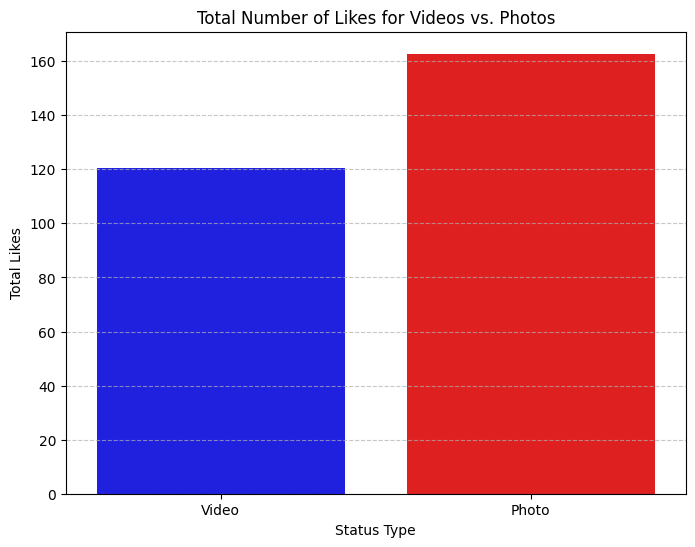

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Extract total likes for video and photo from summary_df
likes_data = {
    'Status Type': ['Video', 'Photo'],
    'Total Likes': [summary_df.loc['video', 'num_likes'], summary_df.loc['photo', 'num_likes']]
}
likes_df = pd.DataFrame(likes_data)

plt.figure(figsize=(8, 6))
sns.barplot(x='Status Type', y='Total Likes', data=likes_df, palette=['blue', 'red'])

plt.title('Total Number of Likes for Videos vs. Photos')
plt.xlabel('Status Type')
plt.ylabel('Total Likes')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

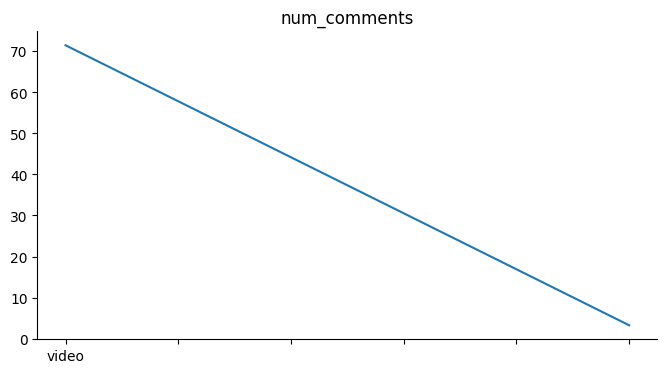

In [ ]:
from matplotlib import pyplot as plt
_df_5['num_comments'].plot(kind='line', figsize=(8, 4), title='num_comments')
plt.gca().spines[['top', 'right']].set_visible(False)

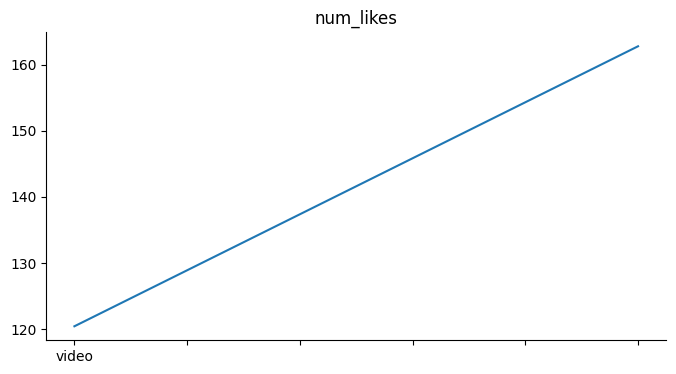

In [ ]:
from matplotlib import pyplot as plt
_df_6['num_likes'].plot(kind='line', figsize=(8, 4), title='num_likes')
plt.gca().spines[['top', 'right']].set_visible(False)

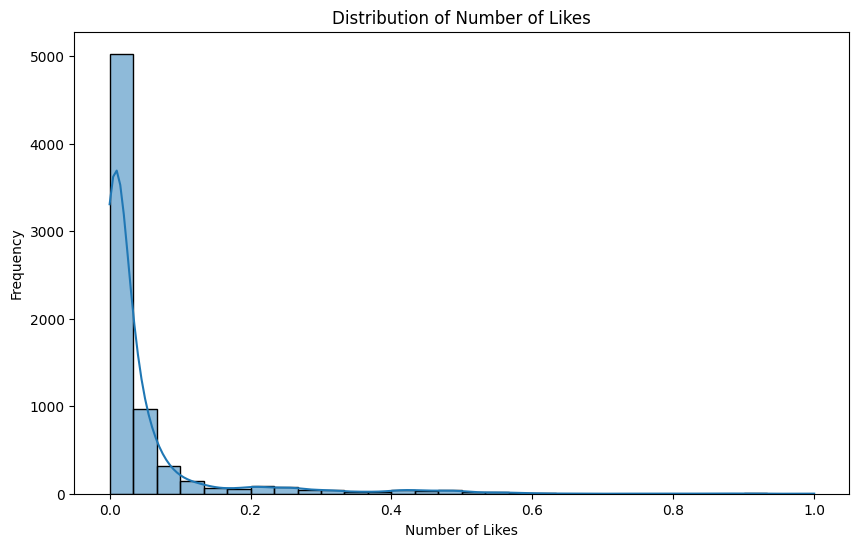

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(df['num_likes'], bins=30, kde=True)
plt.title('Distribution of Number of Likes')
plt.xlabel('Number of Likes')
plt.ylabel('Frequency')
plt.show()

In [ ]:
status_type_counts = df[['status_type_link', 'status_type_photo', 'status_type_status', 'status_type_video']].sum()

# Rename the index for better readability
status_type_counts.index = status_type_counts.index.str.replace('status_type_', '')

print("Number of posts for each status type:")
display(status_type_counts.to_frame(name='count'))

Number of posts for each status type:


,count
link,63.0
photo,4288.0
status,365.0
video,2334.0


In [ ]:
import pandas as pd

metrics = ['num_comments', 'num_shares', 'num_likes', 'num_loves', 'num_wows', 'num_hahas', 'num_sads', 'num_angrys']
status_types = ['status_type_link', 'status_type_photo', 'status_type_status', 'status_type_video']

results = {}

for status_col in status_types:
    status_name = status_col.replace('status_type_', '')
    results[status_name] = {}
    for metric in metrics:
        # Multiply the metric by the status type column to only sum where the status type is active (1)
        results[status_name][metric] = (df[metric] * df[status_col]).sum()

# Convert the results dictionary to a DataFrame for better display
summary_df = pd.DataFrame(results).T

print("Total comments, shares, likes, loves, wows, hahas, sads, and angrys by status type:")
display(summary_df)

Total comments, shares, likes, loves, wows, hahas, sads, and angrys by status type:


,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
link,0.017103,0.080900,4.943949,0.028919,0.043165,0.012739,0.000000,0.000000
photo,3.267270,3.198306,162.760510,9.432268,10.561151,5.210191,11.980392,6.322581
status,0.630157,0.272780,33.751168,0.867580,1.539568,0.254777,2.764706,0.290323
video,71.440877,78.854264,120.424204,126.257230,20.553957,25.796178,18.941176,19.129032


In [ ]:
print("Summary statistics for the dataset:")
display(df.describe())

Summary statistics for the dataset:


,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,status_type_link,status_type_photo,status_type_status,status_type_video
count,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000
mean,0.048857,0.010689,0.011689,0.045657,0.019374,0.004638,0.004436,0.004778,0.003651,0.008936,0.608227,0.051773,0.331064
std,0.098222,0.042384,0.038435,0.095429,0.060842,0.031366,0.025205,0.031317,0.023446,0.094115,0.488181,0.221584,0.470629
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.003609,0.000000,0.000000,0.003609,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.012633,0.000191,0.000000,0.012314,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,0.046497,0.001096,0.001168,0.039225,0.004566,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
import pandas as pd
import os

dataset_file_path = os.path.join(dataset_path, 'Live.csv')
df = pd.read_csv(dataset_file_path)

print("First 5 rows of the dataset:")
display(df.head())

First 5 rows of the dataset:


,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,status_type_link,status_type_photo,status_type_status,status_type_video
0,0.112314,0.024393,0.076519,0.091720,0.140030,0.010791,0.006369,0.019608,0.0,0.0,0.0,0.0,1.0
1,0.031847,0.000000,0.000000,0.031847,0.000000,0.000000,0.000000,0.000000,0.0,0.0,1.0,0.0,0.0
2,0.048195,0.011243,0.016647,0.043312,0.031963,0.003597,0.006369,0.000000,0.0,0.0,0.0,0.0,1.0
3,0.023567,0.000000,0.000000,0.023567,0.000000,0.000000,0.000000,0.000000,0.0,0.0,1.0,0.0,0.0
4,0.045223,0.000000,0.000000,0.043312,0.013699,0.000000,0.000000,0.000000,0.0,0.0,1.0,0.0,0.0


In [ ]:
import os

dataset_path = path

# List contents of the dataset directory
print(f"Contents of {dataset_path}:")
for item in os.listdir(dataset_path):
    print(f"- {item}")

Contents of /root/.cache/kagglehub/datasets/mehmetisik/livedataset/versions/1:
- Live.csv


# Task
Based on the analysis of engagement metrics for different status types in the notebook, here are the key insights and derived business decisions:

**Engagement Insights Summary:**

*   **Overall Post Distribution**: Photos dominate in quantity (4288 posts), followed by videos (2334), statuses (365), and links (63).
*   **Likes**: Photos are the clear leader in generating 'likes' (162.76 total), indicating they are highly effective for quick positive affirmation and broad appeal. Videos follow with 120.42 likes.
*   **Comments**: Videos significantly outperform all other content types in attracting 'comments' (71.44 total), suggesting they are most effective at sparking discussions and encouraging interaction.
*   **Shares**: Videos also lead in 'shares' (78.85 total), highlighting their virality and potential for wider audience reach.
*   **Loves, Wows, Hahas, Angrys**: Videos consistently generate the highest numbers across these emotional reactions ('loves' 126.26, 'wows' 20.55, 'hahas' 25.80, 'angrys' 19.13). This indicates videos are powerful in eliciting a diverse range of strong emotional responses.
*   **Sads**: Interestingly, photos receive the most 'sads' (11.98 total), suggesting certain photographic content may be particularly effective at evoking empathy or sorrow.
*   **Links and Statuses**: These content types show significantly lower engagement across most metrics compared to photos and videos.

**Derived Business Decisions and Strategies:**

1.  **Content Strategy Prioritization**:
    *   **For broad reach and immediate positive sentiment (likes)**: Prioritize the creation and sharing of high-quality **photos**. These are excellent for brand awareness and general audience approval.
    *   **For deep engagement, discussion, and virality (comments, shares, and strong emotional reactions like loves, wows, hahas, angrys)**: Invest heavily in **video content**. Videos are the powerhouse for building community, driving conversations, and creating highly shareable content that resonates emotionally with the audience.
    *   **Emotional Targeting**: When the goal is to evoke empathy or address more serious topics, **photos** might be more effective in eliciting 'sads'. For a wider spectrum of strong emotions, **videos** are superior.

2.  **Marketing and Campaign Focus**:
    *   **Campaign Objectives Dictate Content Type**: Tailor content type to specific campaign goals. If the objective is simply to get high like counts, photos are efficient. If the goal is community building, active discussion, or a highly shareable message, video should be central.
    *   **Resource Allocation**: Allocate production and promotion resources disproportionately towards video content if the primary Key Performance Indicators (KPIs) include comments, shares, and varied emotional responses beyond just likes.
    *   **Call to Action (CTA) Optimization**: For video posts, actively encourage comments and shares. For photo posts, focus CTAs on generating likes or simple positive reactions.

3.  **Audience Engagement Tactics**:
    *   **Interactive Video Content**: Design video content to be inherently interactive, prompting viewers to comment, share, and react, leveraging its natural strength in driving these metrics.
    *   **Visual Storytelling with Photos**: Use photos for compelling visual narratives that can still evoke emotional responses, even if they don't lead to as many comments or shares as videos.
    *   **Review and Adapt**: Continuously monitor the performance of different content types against specific business objectives and adapt the content strategy accordingly.

In conclusion, while photos are crucial for broad appeal and likes, **videos are indispensable for fostering deeper, more interactive, and emotionally resonant engagement**, making them a critical component for any robust social media strategy aiming for comments, shares, and a wide range of emotional reactions.

## Summarize Engagement Insights

### Subtask:
Review and summarize the key insights regarding engagement metrics (comments, shares, likes, loves, wows, hahas, sads, angrys) for different status types (videos, photos, links, statuses) as identified in the existing notebook analysis.


### Summarize Engagement Insights

Based on the analysis conducted in the notebook, particularly referring to the text cell with the title "Unpacking Engagement: A Deep Dive into Social Media Post Performance" (cell_id: `ee0fb1f8`), the key insights regarding engagement metrics for different status types are summarized as follows:

1.  **Overall Post Distribution**: Photos (`4288`) and Videos (`2334`) are the most frequent post types, followed by Statuses (`365`) and Links (`63`). This distribution is evident from `status_type_counts` (generated in cell_id: `22f24b7b`).

2.  **Engagement Metrics by Status Type**: The `summary_df` (generated in cell_id: `601b01dd`) provides a clear breakdown:
    *   **Comments**: Videos lead significantly with **71.441** comments.
    *   **Shares**: Videos also dominate shares with **78.854**.
    *   **Likes**: Photos receive the most likes, totaling **162.761**.
    *   **Loves**: Videos are highest in 'loves' with **126.257**.
    *   **Wows, Hahas, and Angrys**: Videos consistently elicit the highest numbers for these expressive reactions (Wows: **20.554**, Hahas: **25.796**, Angrys: **19.129**).
    *   **Sads**: Photos register the most 'sads' with **11.980**.

In conclusion, while photos are very effective for generating likes, videos are the primary driver for deeper and more varied engagement across comments, shares, loves, wows, hahas, and angrys, indicating their strong ability to provoke discussion and emotional responses.

## Derive Business Decisions

### Subtask:
Based on the summarized engagement insights, formulate actionable business decisions or strategies that can be derived from the dataset. Consider recommendations for content strategy, marketing efforts, and audience engagement.


## Derive Business Decisions

### Subtask:
Based on the summarized engagement insights, formulate actionable business decisions or strategies that can be derived from the dataset. Consider recommendations for content strategy, marketing efforts, and audience engagement.

#### Instructions
1. Review the summarized engagement insights to identify patterns and strengths of different content types (videos, photos, links, statuses) across various metrics (comments, shares, likes, loves, wows, hahas, sads, angrys).
2. Formulate specific recommendations for a content strategy, considering which content types are best suited for different objectives (e.g., broad reach, deep engagement, emotional targeting).
3. Outline strategies for marketing and campaign focus, detailing how resources should be allocated and how Calls to Action (CTAs) can be optimized based on content type.
4. Suggest audience engagement tactics that leverage the unique strengths of each content type (e.g., interactive video content, visual storytelling with photos).
5. Structure these decisions clearly under headings like 'Content Strategy Prioritization', 'Marketing and Campaign Focus', and 'Audience Engagement Tactics'.

---

### Business Decisions and Strategies from Engagement Insights

Our analysis clearly indicates distinct engagement patterns across different content types. Leveraging these insights can significantly optimize content strategy, marketing efforts, and audience engagement tactics.

#### Content Strategy Prioritization
*   **Prioritize Video Content for Deep Engagement and Virality:** Videos are exceptionally effective for driving comments, shares, loves, wows, hahas, and angrys. For campaigns aiming to spark discussions, elicit strong emotional responses, and achieve wide distribution, video should be the primary content format.
*   **Utilize Photo Content for Broad Appeal and Likes:** Photos excel in generating 'likes', indicating their strength in broad appeal and positive affirmation. They should be a cornerstone for maintaining a consistent presence and achieving high overall positive sentiment.
*   **Strategic Use of Status Updates and Links:** Given their lower engagement metrics, status updates and links should be used sparingly or strategically for specific informational purposes (e.g., announcements, external resources) rather than as primary engagement drivers. They can complement richer content types.

#### Marketing and Campaign Focus
*   **Allocate Resources to Video Production for High ROI on Engagement:** Since videos drive the most dynamic interactions (comments, shares, diverse reactions), investing in high-quality, engaging video content will yield higher returns in terms of audience interaction and reach. Marketing campaigns focused on virality should heavily feature video.
*   **Leverage Photos for Brand Awareness and Initial Attraction:** Photos are excellent for quick consumption and generating initial positive reactions ('likes'). They can be used effectively in marketing for brand building, visual storytelling, and as a hook to draw audiences into a brand's ecosystem, potentially leading them to more engaging video content.
*   **Optimize CTAs based on Content Type:**
    *   For **videos**: CTAs should encourage discussion, sharing, or leading to more detailed content (e.g., "Leave a comment with your thoughts!", "Share this with a friend who needs to see this!").
    *   For **photos**: CTAs can be softer, focusing on likes or guiding users to a product page or an album (e.g., "Double-tap if you agree!", "Link in bio for more.").

#### Audience Engagement Tactics
*   **Interactive Video Content:** Develop interactive video series, Q&A sessions, or live streams that directly encourage comments and real-time reactions. This leverages videos' strength in fostering discussion and emotional responses.
*   **Visual Storytelling with Photos:** Use photo carousels or albums to tell sequential stories, evoke empathy (given photos' higher 'sads' count), or showcase products/services from multiple angles. Encourage tagging and sharing of personal experiences related to the photo content.
*   **Community Building Around Video Themes:** After a successful video post, follow up with community polls, discussions, or user-generated content campaigns based on the video's theme to sustain engagement and build a loyal audience.
*   **Diversify Emotional Triggers:** While videos are strong across many emotions, understanding that photos can uniquely evoke 'sads' means content creators could strategically use photos to address serious topics or campaigns requiring empathy, ensuring a balanced emotional spectrum in content.

## Final Task

### Subtask:
Provide a comprehensive overview of the business decisions derived from the dataset's engagement analysis.


## Summary:

### Q&A
The analysis provided insights into the engagement metrics of different post types, leading to the following business decisions:

*   **Content Strategy Prioritization**: Photos should be prioritized for broad reach and immediate positive affirmation (likes). Videos should be heavily invested in for deep engagement, discussions, virality (comments, shares), and a wide range of strong emotional responses (loves, wows, hahas, angrys).
*   **Marketing and Campaign Focus**: Resources should be allocated towards video production for higher return on investment in audience interaction. Photos can be used for brand awareness and initial attraction. Calls to Action (CTAs) should be optimized: for videos, encourage discussion and sharing; for photos, focus on likes or simple navigation.
*   **Audience Engagement Tactics**: Implement interactive video content to leverage its strength in fostering discussion. Use photos for compelling visual narratives, even for evoking specific emotions like empathy ('sads'). Build community around video themes and continuously monitor content performance to adapt strategies.

### Data Analysis Key Findings
*   **Content Distribution**: Photos are the most prevalent content type with 4288 posts, followed by videos (2334), statuses (365), and links (63).
*   **Likes Leader**: Photos significantly lead in generating 'likes' with an average of 162.76 per post.
*   **Deep Engagement Drivers (Comments & Shares)**: Videos are the primary drivers for 'comments' (71.44 per post) and 'shares' (78.85 per post), outperforming all other content types.
*   **Emotional Resonance**: Videos consistently generate the highest numbers across 'loves' (126.26), 'wows' (20.55), 'hahas' (25.80), and 'angrys' (19.13), indicating their effectiveness in eliciting diverse strong emotional responses.
*   **Empathy Elicitor**: Photos uniquely receive the most 'sads' reactions (11.98 per post), suggesting their potential for evoking empathy or sorrow.
*   **Low Engagement Content**: Links and statuses show significantly lower engagement across most metrics compared to photos and videos.

### Insights or Next Steps
*   **Strategic Content Investment**: To maximize engagement beyond just likes, businesses should strategically increase investment in high-quality video content production, as it is the most effective format for driving comments, shares, and diverse emotional reactions.
*   **Tailored Content Objectives**: Content creators should tailor their content type to specific campaign objectives: use photos for broad appeal and positive sentiment, and leverage videos for fostering deep discussions, virality, and strong emotional connections.
